In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns


# Importing the Datasets

In [2]:
df = pd.read_parquet(r"D:\hackathon_HOD\kaggle_original_train.parquet")


In [3]:
df.head()


,machine_id,security_product_name,machine_version,app_version,av_sig_version,is_beta,rtp_state,is_sxs_passive,default_browser,av_status,...,wim_boot_status,virtual_dev_status,touch_support,pen_support,aoac_support,is_gamer,region_id,malware_status,age,sex
0,4300000,win8defender,1.1.15200.1,4.8.10240.17443,1.275.281.0,0,7.0,0,NaN,53447.0,...,0.0,0.0,0,0,0.0,0.0,1.0,0,41.845023,Male
1,4300001,win8defender,1.1.15100.1,4.18.1806.18062,1.273.512.0,0,7.0,0,NaN,53447.0,...,NaN,0.0,0,0,0.0,1.0,3.0,1,44.207637,Female
2,4300002,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1198.0,0,7.0,0,NaN,53447.0,...,NaN,0.0,0,0,0.0,0.0,15.0,0,42.366857,Female
3,4300003,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1509.0,0,7.0,0,NaN,53447.0,...,0.0,0.0,0,0,0.0,0.0,11.0,1,38.020295,Female
4,4300004,win8defender,1.1.15100.1,4.18.1806.18062,1.273.356.0,0,7.0,0,NaN,53447.0,...,NaN,0.0,0,0,0.0,NaN,NaN,1,53.077069,Male


In [8]:
df.is_beta.unique()

array([0, 1], dtype=int8)

In [5]:
df.shape

(5000000, 85)

In [6]:
#type of objects
typ=df['security_product_name'].dtype
typ

dtype('O')

# Checking and Dropping the Columns with more than 50% of the Null Values

In [4]:
null_percent=df.isnull().sum()/df.shape[0]*100
null_percent
col_drop=null_percent[null_percent>50].keys()
col_drop

Index(['default_browser', 'pua_mode', 'processor_class', 'battery_type',
       'flighting_status', 'threshold_choice', 'wim_boot_status'],
      dtype='object')

In [5]:
df.drop(col_drop, axis=1, inplace=True)

# After Dropping we need to Encode the String Values

In [7]:
object_col_list=[]
for i in df.columns:
    if df[i].dtype==object:
        object_col_list.append(i)
len(object_col_list)

27

In [8]:
l_encoder = preprocessing.LabelEncoder()

for element in object_col_list:
    df[element] = l_encoder.fit_transform(df[element])

In [11]:
len(df)

5000000

In [16]:
df.head()

,security_product_name,machine_version,app_version,av_sig_version,is_beta,rtp_state,is_sxs_passive,av_status,av_prod_installed,av_prod_enabled,...,firmware_version_id,secure_boot_status,virtual_dev_status,touch_support,pen_support,aoac_support,is_gamer,region_id,malware_status,machine_id
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,
0,4,63,59,7676,0,7.0,0,53447.0,1.0,1.0,...,36144.0,0,0.0,0,0,0.0,0.0,10.0,0,1
0,4,64,59,8042,0,7.0,0,53447.0,1.0,1.0,...,33778.0,0,0.0,0,0,0.0,0.0,9.0,0,3
0,4,64,59,8244,0,7.0,0,53447.0,1.0,1.0,...,2562.0,0,0.0,0,0,0.0,0.0,11.0,1,4
0,4,36,13,3614,0,7.0,0,34048.0,2.0,1.0,...,15689.0,1,0.0,0,0,0.0,0.0,8.0,1,7
0,4,63,0,7545,0,7.0,0,46413.0,2.0,1.0,...,8919.0,1,0.0,0,0,0.0,0.0,10.0,1,10


In [17]:
len(df)

5950285

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5950285 entries, 0 to 131216
Data columns (total 76 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   security_product_name          int32  
 1   machine_version                int32  
 2   app_version                    int32  
 3   av_sig_version                 int32  
 4   is_beta                        int8   
 5   rtp_state                      float32
 6   is_sxs_passive                 int8   
 7   av_status                      float32
 8   av_prod_installed              float32
 9   av_prod_enabled                float32
 10  has_tpm                        int8   
 11  country_id                     int16  
 12  city_id                        float32
 13  org_id                         float32
 14  geo_id                         float32
 15  local_name_id                  int8   
 16  platform                       int32  
 17  processor                      int32  
 18  os_

In [12]:
df.isna().sum()

machine_id                    0
security_product_name         0
machine_version               0
app_version                   0
av_sig_version                0
                          ...  
is_gamer                 170654
region_id                170654
malware_status                0
age                           0
sex                           0
Length: 78, dtype: int64

# Here, we are checking for the Categorical or Numerical Data

In [20]:
num_unique = []

for col in df.columns:
    num_unique.append(len(df[col].unique()))


In [21]:
num_unique

[6,
 68,
 108,
 8407,
 2,
 8,
 2,
 22119,
 8,
 7,
 2,
 222,
 94348,
 49,
 290,
 251,
 4,
 3,
 43,
 68,
 14,
 9,
 625,
 8,
 3,
 2,
 3,
 278,
 20,
 3,
 10,
 12,
 3,
 2306,
 141844,
 44,
 7,
 2446,
 4383,
 5,
 461196,
 2,
 2593,
 49,
 748,
 1764,
 1370,
 11,
 31411,
 430,
 3,
 28,
 147,
 268,
 31,
 28,
 9,
 40,
 140,
 6,
 2,
 5,
 6,
 3,
 10,
 628,
 45262,
 2,
 3,
 2,
 2,
 3,
 3,
 16,
 2,
 5950285]

In [22]:
for i in range(0,75):
    if num_unique[i]>100000:
        print(i)

34
40


In [23]:
print(num_unique[34])
print(num_unique[40])


141844
461196


# So we Concluded that since the max unique values are 461196 which far very less from the number of rows i.e. more htan 59 lacs, this implies that all the columns are Categorical

# We tried to impute the Data by various Algorithms like KNN and Random Forest, since the datset is so Huge normal methods are not suitable but since our PCs are not that powerful we are going with normal imputation technique, here Mode.

In [9]:
df.set_index(['machine_id'], inplace=True)

In [10]:
for i in df.columns:
  if df[i].isna().sum()>0:
    df[i].fillna(df[i].mode()[0],inplace=True)
df.head()

,security_product_name,machine_version,app_version,av_sig_version,is_beta,rtp_state,is_sxs_passive,av_status,av_prod_installed,av_prod_enabled,...,secure_boot_status,virtual_dev_status,touch_support,pen_support,aoac_support,is_gamer,region_id,malware_status,age,sex
machine_id,,,,,,,,,,,,,,,,,,,,,
4300000,4,65,77,8109,0,7.0,0,53447.0,1.0,1.0,...,0,0.0,0,0,0.0,0.0,1.0,0,41.845023,1
4300001,4,64,51,7767,0,7.0,0,53447.0,1.0,1.0,...,1,0.0,0,0,0.0,1.0,3.0,1,44.207637,0
4300002,4,65,57,7919,0,7.0,0,53447.0,1.0,1.0,...,1,0.0,0,0,0.0,0.0,15.0,0,42.366857,0
4300003,4,65,57,7985,0,7.0,0,53447.0,1.0,1.0,...,0,0.0,0,0,0.0,0.0,11.0,1,38.020295,0
4300004,4,64,51,7720,0,7.0,0,53447.0,1.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,1,53.077069,1


In [11]:
new_df = df
new_df.to_parquet('New_training.parquet')

In [26]:
#df.isnull().sum()

In [27]:
df['region_id'].isnull().sum()

0

In [28]:
df.is_beta.unique()

array([0, 1], dtype=int8)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5950285 entries, 1 to 9921483
Data columns (total 75 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   security_product_name          int32  
 1   machine_version                int32  
 2   app_version                    int32  
 3   av_sig_version                 int32  
 4   is_beta                        int8   
 5   rtp_state                      float32
 6   is_sxs_passive                 int8   
 7   av_status                      float32
 8   av_prod_installed              float32
 9   av_prod_enabled                float32
 10  has_tpm                        int8   
 11  country_id                     int16  
 12  city_id                        float32
 13  org_id                         float32
 14  geo_id                         float32
 15  local_name_id                  int8   
 16  platform                       int32  
 17  processor                      int32  
 18  os

In [15]:
print(df.isna().sum().sum())

0


# Checking if the dataset is balanced or not w.r.t the target label

Text(0, 0.5, 'Count')

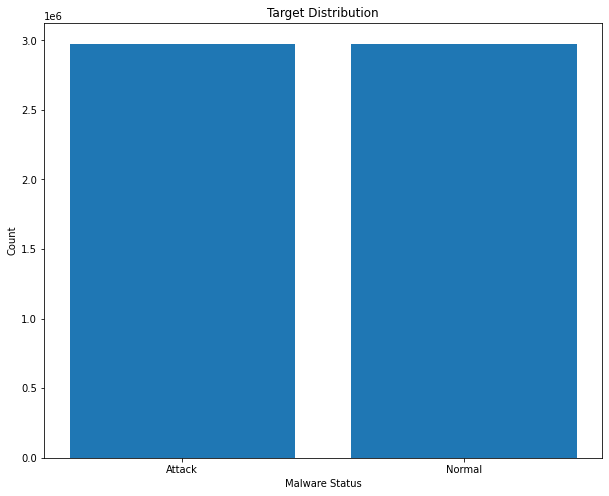

In [31]:
fig,ax=plt.subplots(figsize=(10,8))
bars=ax.bar(['Attack','Normal'],df['malware_status'].value_counts())
#ax.bar_label(bars)
plt.title("Target Distribution")
plt.xlabel('Malware Status')
plt.ylabel('Count')

In [32]:
sample_df = df.sample(n=10000, random_state=1)

In [33]:
sample_df.is_beta.unique()


array([0], dtype=int8)

In [34]:
# This implies we need a larger sample spcae for the visualisation of correlation of is_beta columns so we are dropping here for our convinience
sample_df.drop(['is_beta'], axis=1, inplace=True)

<AxesSubplot:>

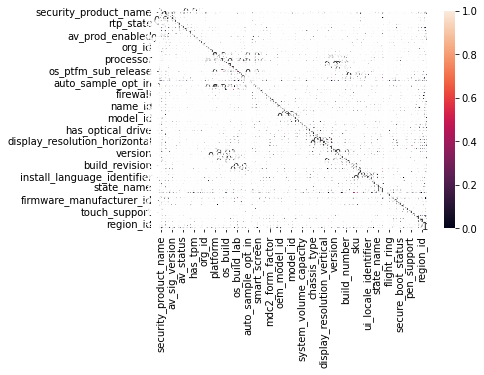

In [35]:

# plot heatmap
sns.heatmap(sample_df.corr() ,annot=True,vmin=0, vmax=1)
# yticks


In [36]:
correlation = sample_df.corr()

In [38]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = df.drop(columns='malware_status')
x=x[1:10000]
# Separating out the target
y = df['malware_status']
# Standardizing the features
x = StandardScaler().fit_transform(x)

Model Training

In [16]:
df.to_parquet('clean_df.parquet')

Feature Selection